- [x] Em quantas execuções o algoritmo convergiu (n o /30 execuções);
- [x] Em que iteração o algoritmo convergiu (média e desvio padrão);
- [ ] Número de indivíduos que convergiram por execução;
- [ ] Fitness médio da população em cada uma das 30 execuções;
- [ ] Colocar gráficos de convergência com a média e o melhor indivíduo por iteração;
- [ ] Fitness médio alcançado nas 30 execuções (média e desvio padrão);
- [ ] Análise adicional: Quantas iterações são necessárias para toda a população convergir?

In [1]:
from matplotlib  import pyplot as plt
import genetic as g
import board as eightqueenss
import pygments#import threading

import sys, os

# Disable
def outputPrint():
    sys.stdout = open('output', 'w')

def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

In [48]:
# Em quantas execuções o algoritmo convergiu (n o /30 execuções)
# Fitness médio alcançado nas 30 execuções (média e desvio padrão)
# Em que iteração o algoritmo convergiu (média e desvio padrão)

n_runs = 30 
new_indiv_func = eightqueens.new_board

runs = []
mean_fitness = []
std_dev_fitness = []
found_solution = 0

iteration_number = []

for r in range(0, n_runs):
    alg = g.Genetic(4, new_indiv_func)
    blockPrint()
    alg.run()
    if alg.solution_was_found:
        found_solution += 1 
        iteration_number.append(alg.iterations)
    
    # calculate mean fitness
    fitness_total = 0
    sum_of_squared_differences = 0
    for p in alg.population:
        fitness_total += p.fitness
        sum_of_squared_differences += (p.fitness - fitness_total/alg.population_size)**2

    std_dev_fitness.append((sum_of_squared_differences/alg.population_size)**(1/2))
    mean_fitness.append(fitness_total/alg.population_size)

enablePrint()
found_solution
 

30

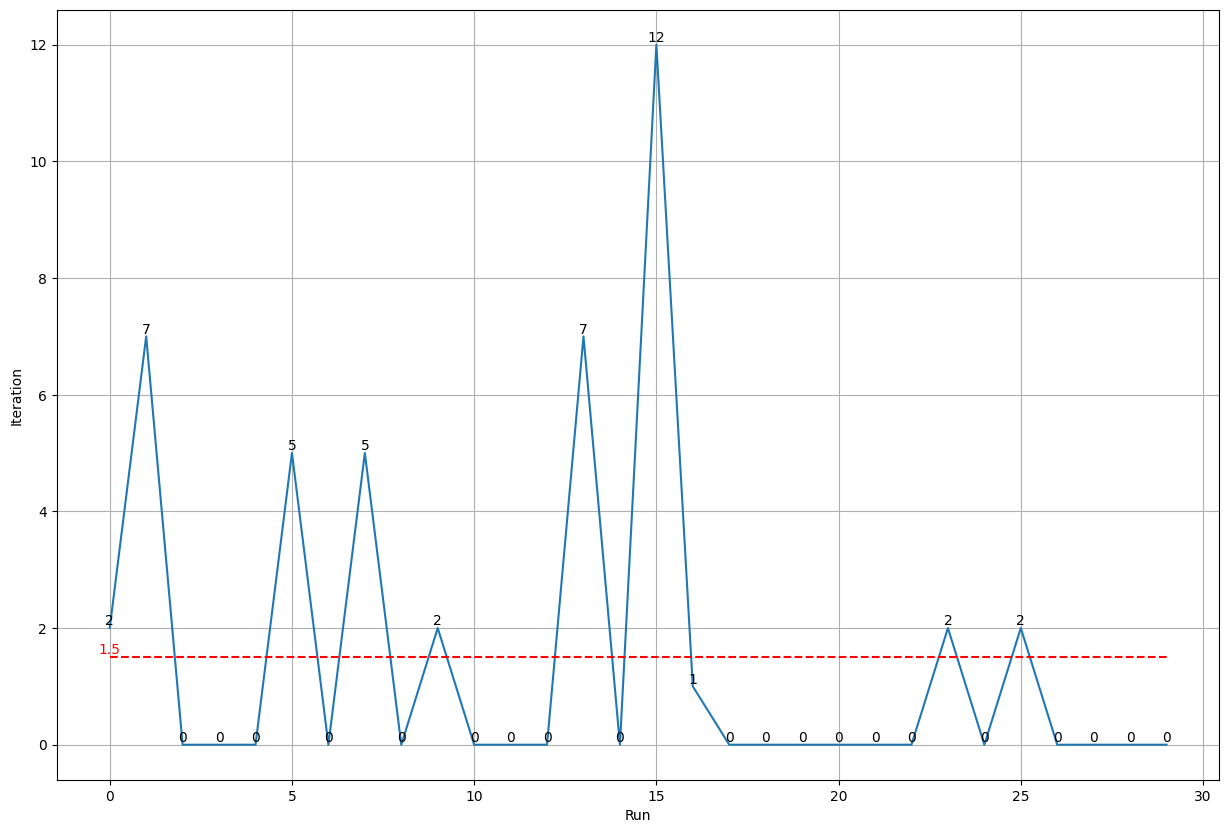

In [49]:
# media do numero de iterações
plt.plot(range(0, n_runs), iteration_number)
plt.xlabel('Run')
plt.ylabel('Iteration')
# set y size
plt.rcParams["figure.figsize"] = (15,10)
# plot a line of the mean of interation_number
mean = sum(iteration_number)/len(iteration_number)
rounded_mean = round(mean, 2)
plt.plot(range(0, n_runs), [rounded_mean]*n_runs, 'r--')
plt.text(0, rounded_mean, str(rounded_mean), ha='center', va='bottom', color='red')

for x, y in zip(range(0, n_runs), iteration_number):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.grid()
plt.show()

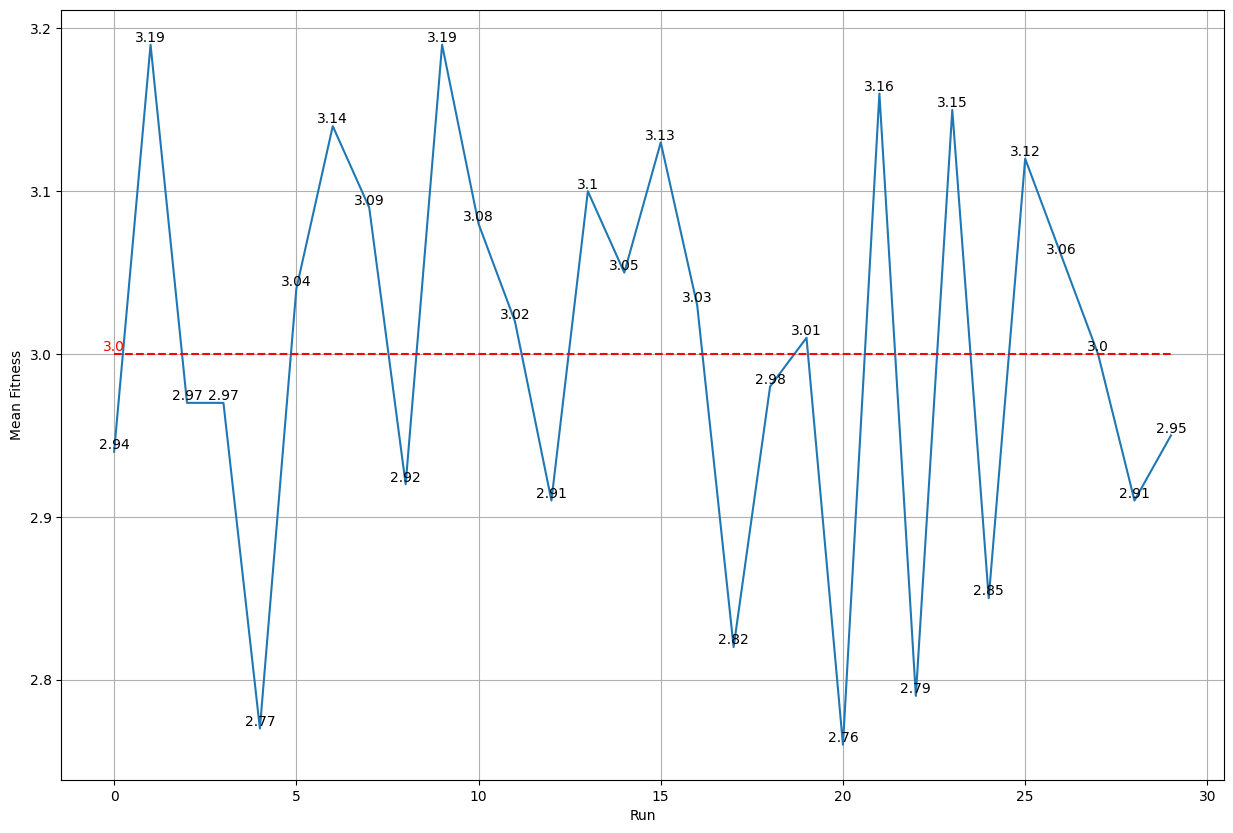

In [50]:
# Fitness medio por execução
plt.plot(range(0, n_runs), mean_fitness)
plt.xlabel('Run')
plt.ylabel('Mean Fitness')
plt.rcParams["figure.figsize"] = (15,10)
mean = sum(mean_fitness)/len(mean_fitness)
rounded_mean = round(mean, 2)
# Plot the mean of the mean_fitess as a line
plt.plot(range(0, n_runs), [rounded_mean]*n_runs, 'r--')
plt.text(0, rounded_mean, str(rounded_mean), ha='center', va='bottom', color='red')

for x, y in zip(range(0, n_runs), mean_fitness):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.grid()
plt.show()


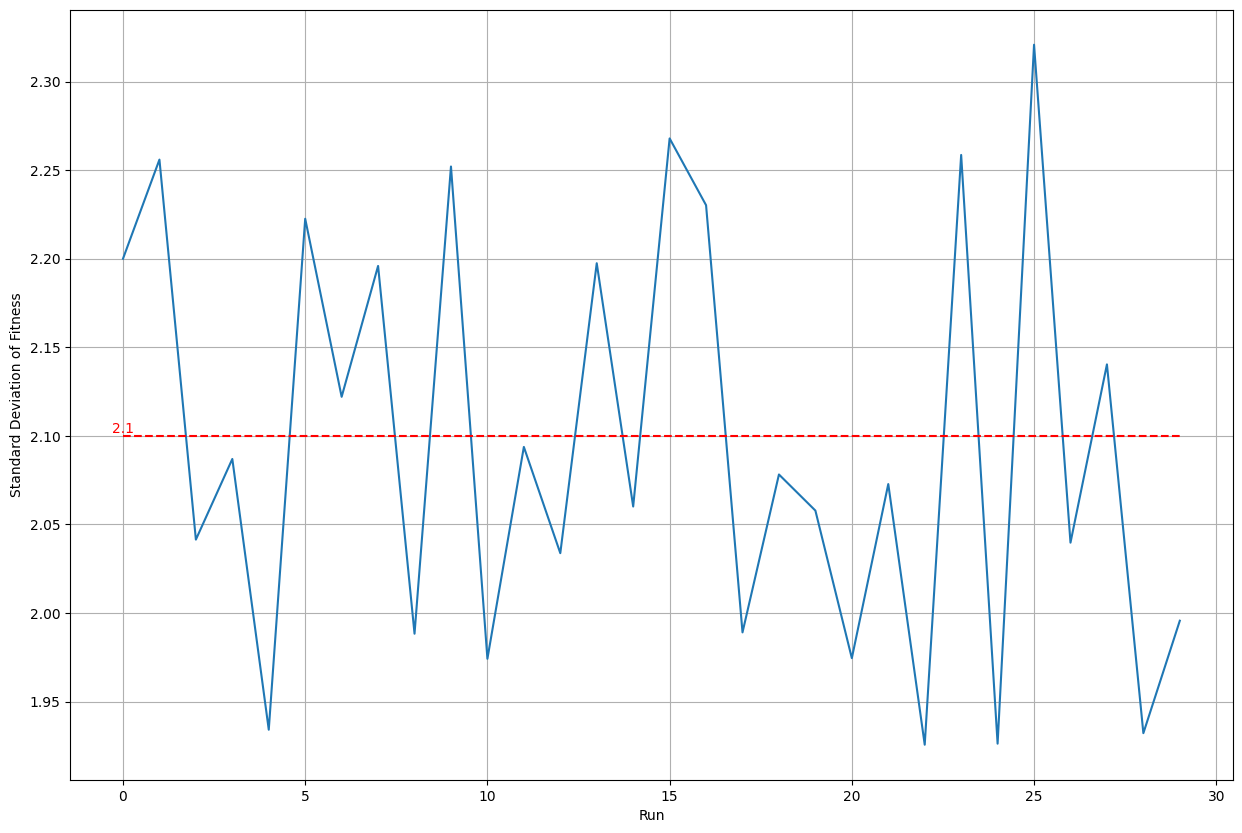

In [52]:
# Desvio padrão do fitness por execução
plt.plot(range(0, n_runs), std_dev_fitness)
plt.xlabel('Run')
plt.ylabel('Standard Deviation of Fitness')
plt.rcParams["figure.figsize"] = (15,10)    
mean = sum(std_dev_fitness)/len(std_dev_fitness)    
rounded_mean = round(mean, 2)       
plt.plot(range(0, n_runs), [rounded_mean]*n_runs, 'r--')    
plt.text(0, rounded_mean, str(rounded_mean), ha='center', va='bottom', color='red')
# for x, y in zip(range(0, n_runs), std_dev_fitness):
#     plt.text(x, y, str(y), ha='center', va='bottom')
plt.grid()
plt.show()

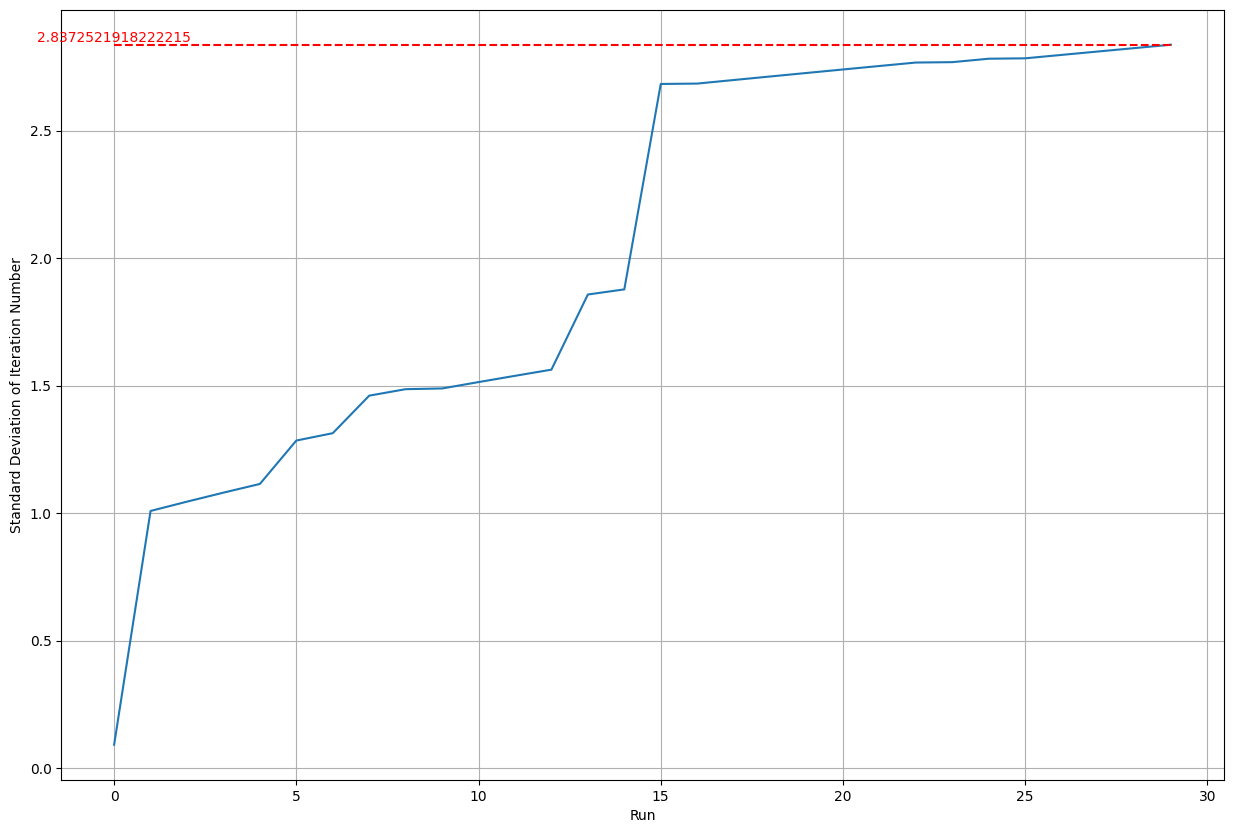

In [56]:
# Desvio padrão do numero de iterações do iteration_number
# iteration_number std dev
std_per_iteration = []
sum_of_squared_differences = 0
mean = sum(iteration_number)/len(iteration_number)
for i in iteration_number: 
    sum_of_squared_differences += (i - mean)**2 
    std = (sum_of_squared_differences/len(iteration_number))**(1/2)                                                                                                                      
    std_per_iteration.append(std)

#plot 
plt.plot(range(0, n_runs), std_per_iteration)
plt.xlabel('Run')
plt.ylabel('Standard Deviation of Iteration Number')
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(range(0, n_runs), [std]*n_runs, 'r--')
plt.text(0, std, str(std), ha='center', va='bottom', color='red')
plt.grid()
plt.show()




In [ ]:
# Fitness médio da população em cada uma das 30 execuções

In [ ]:
# Colocar gráficos de convergência com a média e o melhor indivíduo por iteração

In [ ]:
# Análise adicional: Quantas iterações são necessárias para toda a população convergir?